In [18]:
import pandas as pd
import numpy as np
from GetData import main
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

In [19]:
data = main()

Do you have a saved file (Y/N)?:y
Please enter the year of your data file (1990-2017):2015


In [20]:
print(data)

[['Lecture' '10119' '11' ..., 'ACTG' '617' '01']
 ['Lecture' '10120' '11' ..., 'ACTG' '630' '01']
 ['Lecture' '10121' '0' ..., 'AEIS' '101' '01']
 ..., 
 ['Lecture' '35859' '0' ..., 'WR' '321' '03']
 ['Lecture' '35860' '5' ..., 'WR' '408' '03']
 ['Lecture' '35861' '13' ..., 'WR' '423' '03']]


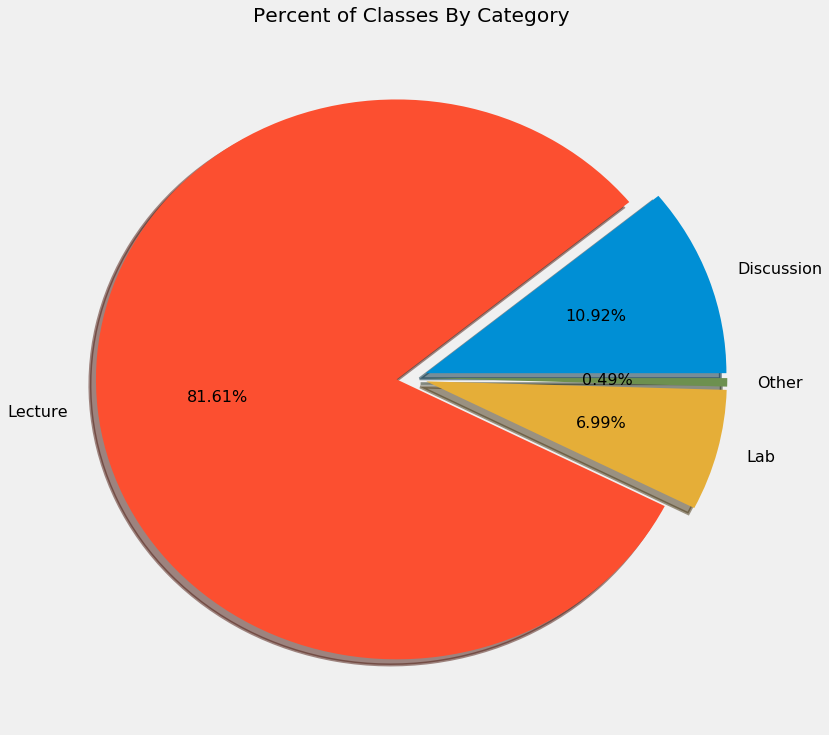

In [16]:
typeOfClass = {"Discussion":0, "Lecture":0, "Lab":0, "Other":0}
for c in range(len(data)):
    if data[c][0] in typeOfClass:
        typeOfClass[data[c][0]] += 1
    else:
        typeOfClass["Other"] += 1
        
raw = {"Type":["Discussion", "Lecture", "Lab", "Other"],
      "Count":[typeOfClass["Discussion"],typeOfClass["Lecture"],typeOfClass["Lab"],typeOfClass["Other"]]}
classTypeData = pd.DataFrame(raw, columns = ["Type", "Count"])
#print(classTypeData)

classTypeData["Total"] = sum([int(row[1]["Count"]) for row in classTypeData.iterrows()])

style.use("fivethirtyeight")
axes = classTypeData.plot.pie("Count",explode=[0.05,0.05,0.05,0.05], labels=classTypeData["Type"], legend = False, \
                     fontsize=16, autopct='%.2f%%', figsize=(12,12), shadow=True, wedgeprops={'linewidth':3})
axes.set_ylabel('')
plt.title("Percent of Classes By Category")
plt.show()

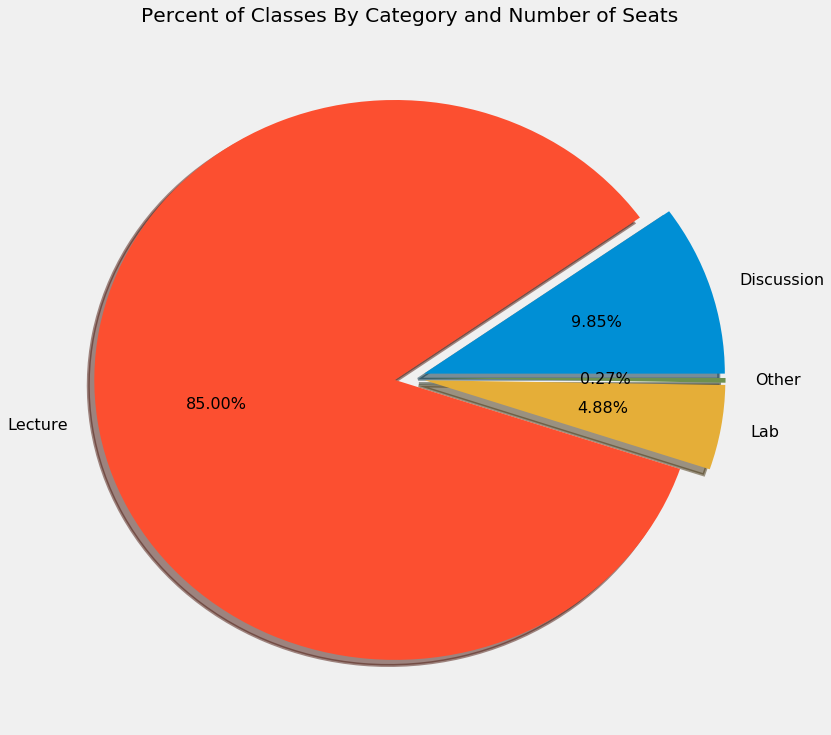

In [17]:
typeOfClass = {"Discussion":0, "Lecture":0, "Lab":0, "Other":0}
for c in range(len(data)):
    if data[c][0] in typeOfClass:
        typeOfClass[data[c][0]] += int(data[c][3])
    else:
        typeOfClass["Other"] += 15
        
raw = {"Type":["Discussion", "Lecture", "Lab", "Other"],
      "Count":[typeOfClass["Discussion"],typeOfClass["Lecture"],typeOfClass["Lab"],typeOfClass["Other"]]}
classTypeData = pd.DataFrame(raw, columns = ["Type", "Count"])
#print(classTypeData)

classTypeData["Total"] = sum([int(row[1]["Count"]) for row in classTypeData.iterrows()])

style.use("fivethirtyeight")
axes = classTypeData.plot.pie("Count",explode=[0.05,0.05,0.05,0.05], labels=classTypeData["Type"], legend = False, \
                     fontsize=16, autopct='%.2f%%', figsize=(12,12), shadow=True, wedgeprops={'linewidth':3})
axes.set_ylabel('')
plt.title("Percent of Classes By Category and Number of Seats")
plt.show()

    Discussion  Lab  Lecture  Other
01         614  357     3997     26
02         539  362     4172     28
03         486  330     4081     19


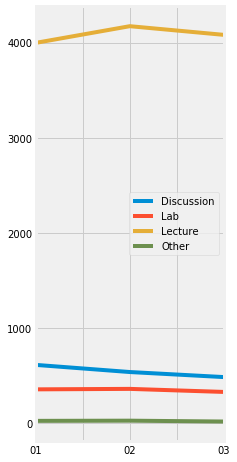

In [38]:
classTypes = {"Discussion":0, "Lecture":0, "Lab":0, "Other":0}
fall,winter,spring = classTypes.copy(),classTypes.copy(),classTypes.copy()
typeTerm = {"01":fall, "02":winter, "03":spring}
for section in data:
    if section[0] in classTypes:
        typeTerm[section[-1]][section[0]] += 1
    else:
        typeTerm[section[-1]]["Other"] += 1
        
df = pd.DataFrame(typeTerm).T
print(df)
df.plot.line(figsize=(3,8))